In [1]:
import cv2
from encoder.vinvl_encoder import Encoder
from decoder.gqa_decoder import Decoder
import torch
import matplotlib.pyplot as plt

In [2]:
encoder = Encoder()

In [3]:
decoder = Decoder(checkpoint = '/workspace/shared/gqa_output/checkpoint-9')

In [4]:
img1 = cv2.imread('/workspace/shared/vqa_images/COCO_train2014_000000000025.jpg', cv2.IMREAD_UNCHANGED)
img2 = cv2.imread('/workspace/airplane.jpg', cv2.IMREAD_UNCHANGED)
img3 = cv2.imread('/workspace/pitching.jpg', cv2.IMREAD_UNCHANGED)

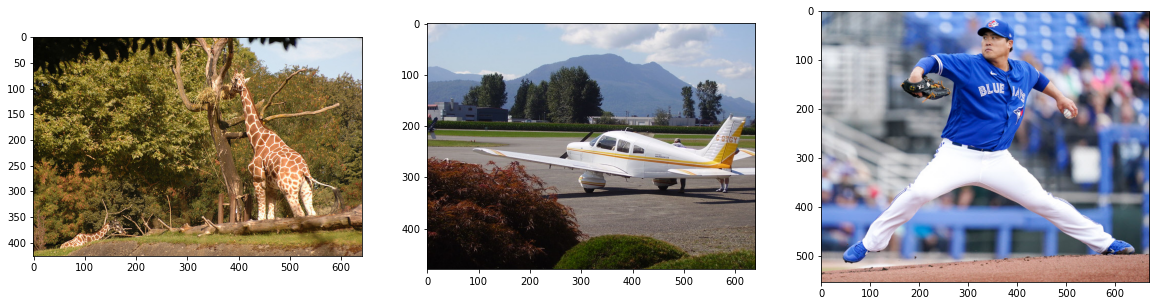

In [5]:
fig = plt.figure(figsize=(20,12))
for i in range(1,4):
    fig.add_subplot(fig.add_subplot(1, 3, i))
    plt.imshow(cv2.cvtColor(eval('img' + str(i)), cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
encoded = encoder([img1, img2, img3])
questions = ["Could this photo be from a field?", "How about weather", "What color is the uniform"]
for i in range(len(encoded)):
    encoded[i].append(questions[i])

/workspace/scene_graph_benchmark/maskrcnn_benchmark/structures/boxlist_ops.py:47: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  (ws >= min_size) & (hs >= min_size)


In [7]:
out = decoder(encoded)

In [8]:
def get_answer(candidates):
    outs = []
    for temp in candidates:
        arr = []
        for value in temp.values():
            arr.append(value)
        arr = torch.nn.functional.softmax(torch.Tensor(arr), dim=0)
        argmax = arr.argmax().numpy().item()
        if arr[argmax].numpy().item() / arr.sum() > 0.9:
            outs.append([list(temp.keys())[argmax], arr[argmax].item()])
        else:
            outs.append("Unkwonw")
    return outs
    

In [9]:
get_answer(out)

[['yes', 0.9999639987945557],
 ['cloudy', 0.9680545330047607],
 ['blue', 0.9386337995529175]]